In [1]:
sqr_feet=[250,300,400,450,500,550,600,610,620,680,720,1000,1020,1040]
price=[1000,1500,2000,2500,3000,3500,4000,4500,4800,5000,5050,5200,5300,5400]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data=pd.DataFrame({"sqr_feet":sqr_feet,"price":price})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sqr_feet  14 non-null     int64
 1   price     14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [7]:
data

,sqr_feet,price
0,250,1000
1,300,1500
2,400,2000
3,450,2500
4,500,3000
5,550,3500
6,600,4000
7,610,4500
8,620,4800
9,680,5000


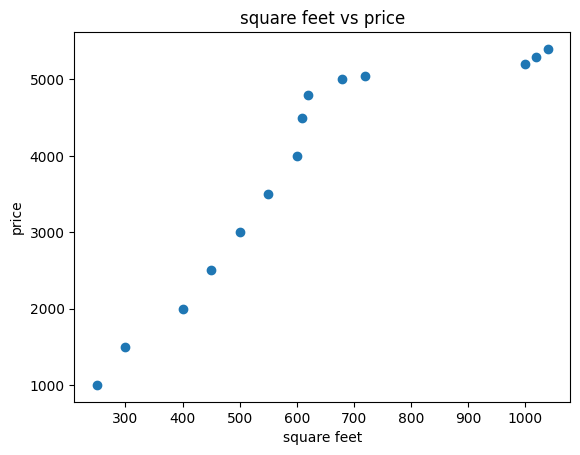

In [8]:
    plt.scatter(sqr_feet,price)
    plt.xlabel("square feet")
    plt.ylabel("price")
    plt.title("square feet vs price")
    plt.show()

In [9]:
data.corr()

,sqr_feet,price
sqr_feet,1.000000,0.899926
price,0.899926,1.000000


In [10]:
data["sqr_feet"]

0      250
1      300
2      400
3      450
4      500
5      550
6      600
7      610
8      620
9      680
10     720
11    1000
12    1020
13    1040
Name: sqr_feet, dtype: int64

In [19]:
Y = data['price'].values.reshape(-1, 1)
X = data['sqr_feet'].values.reshape(-1, 1)

In [20]:
X

array([[ 250],
       [ 300],
       [ 400],
       [ 450],
       [ 500],
       [ 550],
       [ 600],
       [ 610],
       [ 620],
       [ 680],
       [ 720],
       [1000],
       [1020],
       [1040]])

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [23]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_test)
lr_acc=lr.score(X_train,Y_train)

In [24]:
lr_acc

0.7926900022642411

In [25]:
lr.intercept_

array([538.56165068])

In [26]:
lr.coef_

array([[5.23139821]])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [28]:
mae = mean_absolute_error(Y_test, lr_pred)
mse = mean_squared_error(Y_test, lr_pred)
rmse = np.sqrt(mse)

In [29]:
mae

773.4862110311748

In [30]:
mse

619546.8323929204

In [31]:
rmse

787.1129730813236

In [32]:
def sqrt(x):
    return lr.coef_*x+lr.intercept_

In [33]:
sqrt(5000)

array([[26695.55272449]])

In [34]:
first=sum((Y_test-lr_pred)**2)
second=sum((Y_test-Y_test.mean())**2)


In [35]:
r_square=1-first/second

In [36]:
r_square

array([0.83444414])